<a href="https://colab.research.google.com/github/shailesh3335/Project/blob/main/Black_Friday_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib as mlp
import matplotlib.pyplot as plt

**Reading the data**

Black Friday Data Set

In [ ]:
data = pd.read_csv("/content/train.csv")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [ ]:
data.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


**Data Cleaning**

In [ ]:
data.isnull().sum()
#Looks like we have some null/NaN values in the product categories.

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

The NaN values for Product_Category_2 and Product_Category_3 would mean that the concerned person did not buy the products from these categories.

Hence,That it would be safe to replace them wiht 0.

In [ ]:
data.fillna(value=0,inplace=True)

In [ ]:
data.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [ ]:
# We might not need product Id and user Id hence dropping them
data=data.drop(["User_ID","Product_ID"],axis=1)

In [ ]:
data.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

**Data visualization**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


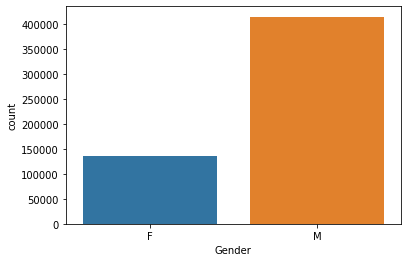

In [ ]:
sns.countplot(data['Gender'])

Looking at above count plot,looks like very less number of females attended the blck friday sale. But it could also mean  less number of females paid for the products and may be their spouse paid for them.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


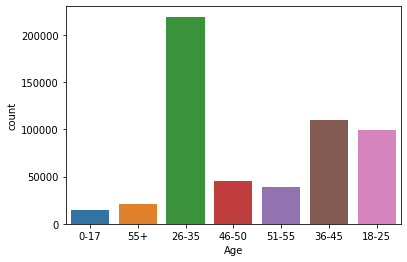

In [ ]:
sns.countplot(data['Age'])

Count plot for age, seems like the majority of the population in the ages group 26-35 attended the sale.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


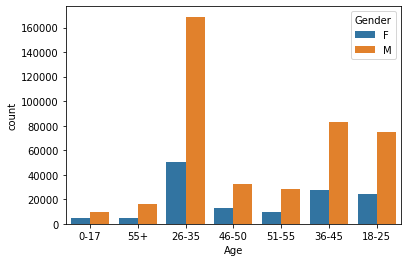

In [ ]:
sns.countplot(data["Age"],hue=data["Gender"])

Further, I could also check among the age groups, which gender was a majority by adding a hue. And as seen above, more males spent in the sale than females.


May be we could check further - how many of these males were actually married? For this lets create a column that represents gender+married status and then use it as hue.


In [ ]:
data['combined_G_M'] = data.apply(lambda x:'%s_%s' % (x['Gender'],x['Marital_Status']),axis=1)
print(data['combined_G_M'].unique())
['F_0' 'M_0' 'M_1' 'F_1']


['F_0' 'M_0' 'M_1' 'F_1']


['F_0M_0M_1F_1']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


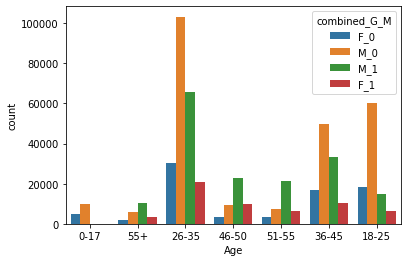

In [ ]:
sns.countplot(data['Age'],hue=data['combined_G_M'])

As we see above, there are no bars for the married in the 0-17 range which makes sense. And then if we look at the 46 and above groups, females are very less. But on the other hand, married males paying in range 46-55 are also comparatively more than married females. So it could also imply that though ladies do shop a lot, their spouses are possibly paying for it and hence data reflects that men shopped more. If we had more categorical data defining what kind of products were purchased by men, we could dig in this statement further. However, since in this dataset we don't know if there is a category that implies feminine products/clothes we cannot further explore this case.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


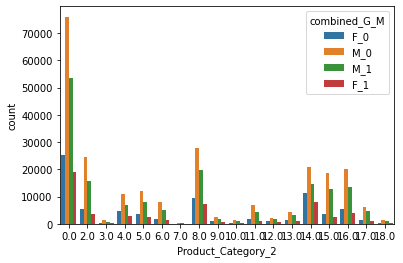

In [ ]:
sns.countplot(data['Product_Category_2'],hue=data['combined_G_M'])


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


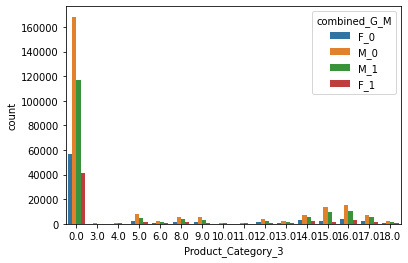

In [ ]:
sns.countplot(data['Product_Category_3'],hue=data['combined_G_M'])


Even above plots don't provide any hint of whether some products are particularly being purchased by either females or married males.


Let's now draw a heatmap to clearly see what are the **correlations** here.

So, the available datatypes are : int64, float64 and objects. We will leave the numeric datatypes alone and focus on object datatypes as the cannot be directly fen into a Machine Learning Model

**Data Mapping**

In [ ]:
def map_gender(gender):
    if gender == 'M':
        return 1
    else:
        return 0
data['Gender'] = data['Gender'].apply(map_gender)

In [ ]:
def map_age(age):
    if age == '0-17':
        return 0
    elif age == '18-25':
        return 1
    elif age == '26-35':
        return 2
    elif age == '36-45':
        return 3
    elif age == '46-50':
        return 4
    elif age == '51-55':
        return 5
    else:
        return 6
data['Age'] = data['Age'].apply(map_age)

In [ ]:

def map_city_categories(city_category):
    if city_category == 'A':
        return 2
    elif city_category == 'B':
        return 1
    else:
        return 0
data['City_Category'] = data['City_Category'].apply(map_city_categories)

In [ ]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)


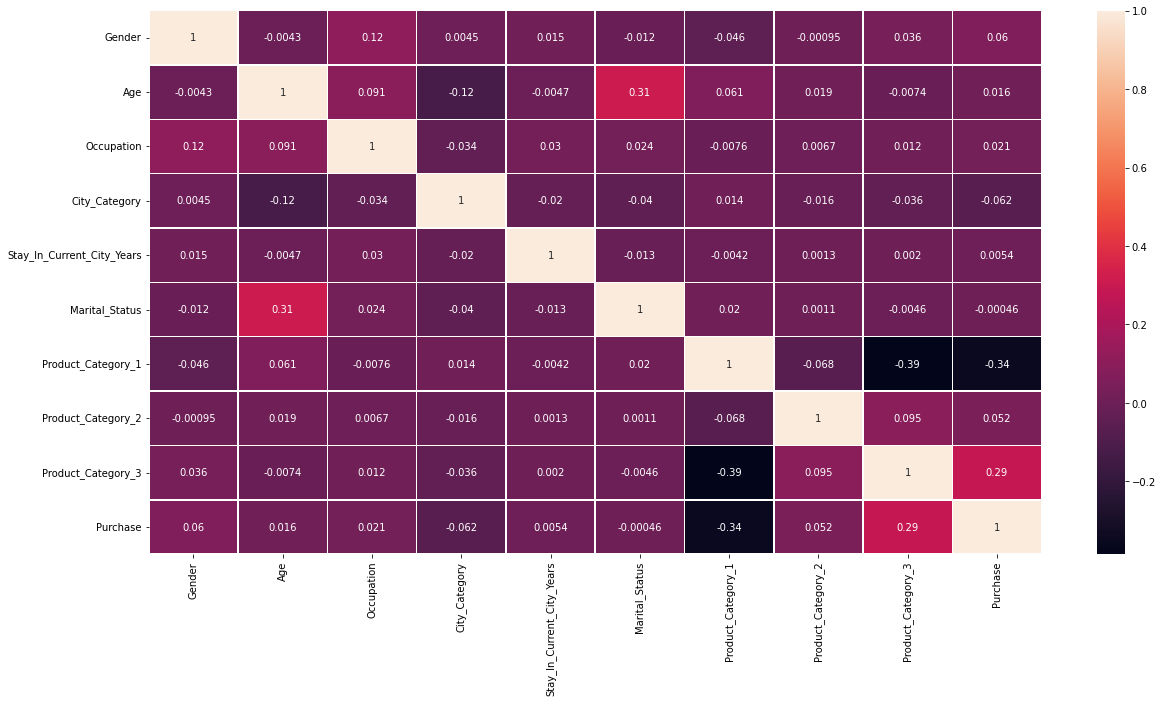

In [ ]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr,
    xticklabels=corr.columns,
    yticklabels=corr.columns,
    annot=True, linewidths=0.5,
    ax=ax)


It can be seen that nothing is highly correlated with the Purchase variable. Although a few conclusions can be drawn:

1.Product_Category_1 has a negative correlation with Purchase.

2.Maritial_Status and Age are strongly correlated. As Expected.

3.Product_Category_3 has a strong correlation with Purchase. Maybe the products in this category were cheap. Let's chrun out some number related to this.

**Model Preparation**

Splitting data into independent and dependent variables.



In [ ]:
x= data.drop('Purchase', axis = 1)
y=data['Purchase']

**Model**

In [ ]:
from sklearn.model_selection import StratifiedKFold,GridSearchCV
from xgboost import XGBRegressor

In [ ]:
lr_range = [0.25]
n_est_range = [150]
depth_range = [8]


parameters = dict(learning_rate=lr_range,
                  n_estimators=n_est_range,
                  max_depth=depth_range)

In [ ]:
kfold = StratifiedKFold(n_splits=5, random_state=2022,shuffle=True)

In [ ]:
clf = XGBRegressor(random_state=2022)

In [ ]:
model = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='r2')

In [ ]:
model.fit(x,y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  UserWarning,


[03:42:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:43:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:44:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:45:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:46:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[03:48:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=XGBRegressor(random_state=2022),
             param_grid={'learning_rate': [0.25], 'max_depth': [8],
                         'n_estimators': [150]},
             scoring='r2')

In [ ]:
print(model.best_score_)


0.6794426790804551
